# Pandas pada Psicólogos
![](https://numfocus.org/wp-content/uploads/2016/07/pandas-logo-300.png)

[pandas - Python Data Analysis Library](https://pandas.pydata.org/docs/)

# Numpy para Psicólogos
![](https://user-images.githubusercontent.com/50221806/85190325-2b3f4400-b26c-11ea-93f3-81a101614a88.png)

[Numerical Python](https://numpy.org/)

## Introducción a los DataSets

In [ ]:
import pandas as pd
import numpy as np
# librería "glob" — Busca nombres de archivos que coincidan con un patrón.
from glob import glob as gg
# Libería "tqdm" para ver el progreso del o de los procesos
from tqdm import tqdm
# Para que "tqdm" funcione
import time

## 1er Dataset. Datos Inventados

In [ ]:
# Búsqueda de las Bases
files_xlsx = gg('*.xlsx')
files_xlsx

In [ ]:
xlsx1 = pd.read_excel(files_xlsx[0])
xlsx1.head()
# ¿El ID lo queremos como índice?

In [ ]:
xlsx1 = pd.read_excel(files_xlsx[0], index_col='ID')
print(xlsx1.head())
#print(' ')
#print(xlsx1.tail())

In [ ]:
# Número de observaciones que tiene el dataset
xlsx1.shape #(filas, columnas)

In [ ]:
xlsx1.shape[0] #quiero solo las filas

In [ ]:
xlsx1.shape[1] #quiero solo las columnas

In [ ]:
# Pero deseo toda la información
xlsx1.info() #¿Cómo interpretar esta información?

In [ ]:
# Quiero saber solo las filas
xlsx1.index

In [ ]:
# Quiero solo saber los nombres de las columnas
xlsx1.columns

In [ ]:
print(xlsx1.Var1.unique())
print(' ')
print(list(xlsx1.Var1.unique()))

In [ ]:
# Quiero saber los valores que convierte la columna Var1 en objeto
objetos = [tipo for tipo in xlsx1.Var1.unique() if type(tipo) == str]
objetos

In [ ]:
objetos = []
for tipo in xlsx1.Var1.unique():
    if type(tipo) == str:
        objetos.append(tipo)
objetos

In [ ]:
objetos = [tipo for tipo in xlsx1.Var5.unique() if type(tipo) == str]
objetos

In [ ]:
objetos = []
for tipo in xlsx1.Var5.unique():
    if type(tipo) == str:
        objetos.append(tipo)
objetos

In [ ]:
xlsx1.columns

In [ ]:
# Hacerlo por cada uno toma mucho recurso de tiempo ¿Cómo mejoramos esto?
objetos = []
for columna in xlsx1.columns:
    print('En la columna {}'.format(columna))
    for tipo in xlsx1[columna].unique():
        if type(tipo) == str:
            print(tipo)
            print(' ')
            objetos.append(tipo)
            
objetos

In [ ]:
objetos = set(objetos)
objetos

In [ ]:
objetos = list(set(objetos))
objetos

In [ ]:
objetos

In [ ]:
lista1 = objetos
lista2 = np.empty(len(lista1))
print(lista2)

In [ ]:
lista2[:] = np.nan
print(lista2)

In [ ]:
objetos3 = zip(lista1, lista2)
objetos4 = dict(objetos3)
objetos4

In [ ]:
# Como debe de verse
objetos = []
for columna in xlsx1.columns:
    for tipo in xlsx1[columna].unique():
        if type(tipo) == str:
            objetos.append(tipo)
            
lista1 = list(set(objetos))
lista2 = np.empty(len(lista1))
lista2[:] = np.nan
objetos = dict(zip(lista1, lista2))
objetos

In [ ]:
xlsx1

In [ ]:
xlsx1 = xlsx1.replace(objetos)
xlsx1

## ¿Se acuerdan de las demás bases?

In [ ]:
print(files_xlsx)

### ¿Qué función aplicamos y cómo lo aplicamos para que haga todo de una buena vez?
#### ¿Se acuerdan del "Ciclo FOR"?

In [ ]:
print(files_xlsx[0])
print(pd.read_excel(files_xlsx[0], index_col='ID').head())
print(' ')
print(files_xlsx[1])
print(pd.read_excel(files_xlsx[1], index_col='ID').head())
print(' ')
print(files_xlsx[2])
print(pd.read_excel(files_xlsx[2], index_col='ID').head())

In [ ]:
for base in files_xlsx:
    print(base)

In [ ]:
for mi_base in tqdm(files_xlsx):
    print('Se arreglará el archivo {} como usted lo pidió'.format(mi_base))
    xlsx = pd.read_excel(mi_base, index_col='ID')
    objetos = []
    for columna in xlsx.columns:
        for tipo in xlsx[columna].unique():
            if type(tipo) == str:
                objetos.append(tipo)

    lista1 = list(set(objetos))
    lista2 = np.empty(len(lista1))
    lista2[:] = np.nan
    objetos = dict(zip(lista1, lista2))
    time.sleep(0.01)

In [ ]:
# ¿Son todos los objetos de todas las bases?
objetos

In [ ]:
# ¿Porqué está dando solo el archivo "Ejemplo3.xlsx?"
# ¿Y los demás?
xlsx

In [ ]:
xlsx.replace(objetos)

## Vamonos despacito

In [ ]:
## Este script solo es para obtener los objetos

objetos = [] # Para los objetos que no nos sirve

for mi_base in tqdm(files_xlsx):
    print('Se arreglará el archivo {} como usted lo pidió'.format(mi_base))
    xlsx = pd.read_excel(mi_base, index_col='ID')
    for columna in xlsx.columns:
        for tipo in xlsx[columna].unique():
            if type(tipo) == str:
                objetos.append(tipo)
    time.sleep(0.01)

In [ ]:
# Aquí hacemos nuestro diccionario de objetos a quitar
lista1 = list(set(objetos))
lista2 = np.empty(len(lista1))
lista2[:] = np.nan
objetos = dict(zip(lista1, lista2))

In [ ]:
objetos

In [ ]:
import pandas as pd
import numpy as np
from glob import glob as gg

In [ ]:
files_xlsx = gg('*.xlsx')
files_xlsx

In [ ]:
## Concatenando bases
x1 = pd.read_excel(files_xlsx[0], index_col='ID')
print(x1.axes)
print(x1.shape)
print(' ')
x2 = pd.read_excel(files_xlsx[1], index_col='ID')
print(x2.axes)
print(x2.shape)
print(' ')
x3 = pd.read_excel(files_xlsx[2], index_col='ID')
print(x3.axes)
print(x3.shape)

In [ ]:
xlsx = pd.concat([x1, x2, x3])
xlsx
## ¿Qué pasó aquí?

In [ ]:
xlsx = pd.concat([x1, x2, x3], axis=1)
xlsx
## ¿Por qué se tiene que colocar el argumento de "axis=1"?

In [ ]:
xlsx.columns

In [ ]:
xlsx.info()

In [ ]:
objetos = [] # Para los objetos que no nos sirve

for columna in xlsx.columns:
    for tipo in xlsx[columna].unique():
        if type(tipo) == str:
            objetos.append(tipo)
time.sleep(0.01)
# Aquí hacemos nuestro diccionario de objetos a quitar
lista1 = list(set(objetos))
lista2 = np.empty(len(lista1))
lista2[:] = np.nan
objetos = dict(zip(lista1, lista2))

In [ ]:
## Reemplazamos los objetos
xlsx = xlsx.replace(objetos)
xlsx

In [ ]:
xlsx.info()

In [ ]:
## Queremos ordenar las variables
xlsx = xlsx.sort_index(axis=1)
xlsx.axes
#¿Por qué las columnas están de manera diferente?

In [ ]:
xlsx.describe()

In [ ]:
# Ver por separado los descriptivos
conteo = xlsx.count()
print(conteo)

In [ ]:
tiene_nans = xlsx.isna()
print(tiene_nans)

In [ ]:
cuantos_nan = xlsx.isna().sum()
print(cuantos_nan)

In [ ]:
conteo + cuantos_nan

In [ ]:
xlsx.mean(axis=1)

In [ ]:
xlsx.median(axis=1)

In [ ]:
xlsx.mode()

In [ ]:
xlsx.iloc[:, 0].mean()

In [ ]:
xlsx.describe()

In [ ]:
xlsx.quantile(.99)

In [ ]:
xlsx.sem()

In [ ]:
xlsx.corr()

In [ ]:
# Guardar los descriptivos en EXCEL
xlsx.describe().to_excel('Descrip_Ejemplo.xlsx')

In [ ]:
descriptivos_pa_mi = xlsx.describe()
descriptivos_pa_mi.to_excel('Descrip_pa_mi.xlsx', sheet_name='Descrip')

In [ ]:
# Queremos guardar muchas cosas
## Base Completa
## Media
## Mediana
## Correlación
## Etc

In [ ]:
with pd.ExcelWriter('Nuevo_descrip_flora.xlsx') as writer:
    xlsx.to_excel(writer, 'Base Completa')
    xlsx.describe().to_excel(writer, 'Descriptivos')
    xlsx.mean().to_excel(writer, 'Media')

In [ ]:
with pd.ExcelWriter('Descrip_Otro_Ejemplo.xlsx') as writer:
    xlsx.to_excel(writer, 'Base Completa')
    xlsx.mean().to_excel(writer, 'Media')
    xlsx.median().to_excel(writer, 'Mediana')
    xlsx.corr().to_excel(writer, 'Correlación')

In [ ]:
with pd.ExcelWriter('Bases todas.xlsx') as todas:
    xlsx.to_excel(todas, 'Basesota')

In [ ]:
xlsx.plot()

In [ ]:
# ¿Cómo ploteamos todo?
xlsx.mean().plot()

In [ ]:
# Aumento del tamaño
xlsx.mean().plot(figsize=(15, 8))

In [ ]:
# Como arreglamos bonito esta gráfica
import matplotlib.pyplot as plt

In [ ]:
list(range(len(xlsx.columns)))
print(xlsx.columns)

In [ ]:
xlsx.mean().plot(figsize=(15, 8))
plt.xticks(range(len(xlsx.columns)), list(xlsx.columns)) #checar plt.xticks

In [ ]:
xlsx.mean().plot(figsize=(15, 8))
plt.xticks(range(len(xlsx.columns)), list(xlsx.columns), rotation='vertical')

In [ ]:
xlsx.mean().plot(figsize=(15, 8))
plt.xticks(range(len(xlsx.columns)), list(xlsx.columns), rotation=80)

In [ ]:
# Agregar etiqueta en los ejes
xlsx.mean().plot(figsize=(15, 8))
plt.xticks(range(len(xlsx.columns)), list(xlsx.columns), rotation='vertical')
plt.xlabel('Columnas')
plt.ylabel('Datos de las columnas')

In [ ]:
xlsx.mean().plot(figsize=(15, 8))
plt.xticks(range(len(xlsx.columns)), list(xlsx.columns), rotation='vertical')
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Datos de las columnas', fontsize=20)

In [ ]:
# Aumento del tamaño de las ticks
xlsx.mean().plot(figsize=(15, 8))
plt.xticks(range(len(xlsx.columns)), list(xlsx.columns), rotation='vertical', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Datos de las columnas', fontsize=20)


In [ ]:
list(range(int(xlsx.mean().min()) - 100, int(xlsx.mean().max()) + 100, 100))

In [ ]:
xlsx.mean().min() - 100

In [ ]:
# Aumento del tamaño de las ticks
xlsx.mean().plot(figsize=(15, 8), color='r')
plt.xticks(range(len(xlsx.columns)), list(xlsx.columns), rotation='vertical', fontsize=15)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Datos de las columnas', fontsize=20)
plt.yticks(range(int(xlsx.mean().min()) - 100, int(xlsx.mean().max()) + 100, 100), fontsize=15)
plt.grid()

In [ ]:
# Guardar gráficas
xlsx.mean().plot(figsize=(15, 8), color='r')
plt.xticks(range(len(xlsx.columns)), list(xlsx.columns), rotation='vertical', fontsize=15)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Datos de las columnas', fontsize=20)
plt.yticks(range(int(xlsx.mean().min()) - 100, int(xlsx.mean().max()) + 100, 100), fontsize=15)
plt.grid()
plt.savefig('Gráfica de ejemplo.png', bbox_inches='tight', dpi=1000)
plt.show()

In [ ]:
# Las columnas no tienen orden ¿Cómo se ordenan?
## Uso de iloc
for n, c in enumerate(xlsx.columns):
    print(n, c)

In [ ]:
columnas_ordenadas = sorted(xlsx.columns, key=lambda x:len(x))

for n, c in enumerate(columnas_ordenadas):
    print(n, c)

In [ ]:
xlsx_iloc1 = xlsx.iloc[:, [0, 11, 22, 24, 25, 26, 27, 28, 29, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23]]
xlsx_iloc1#.columns

In [ ]:
xlsx_iloc1

In [ ]:
xlsx_iloc1.corr()

In [ ]:
# ¿Cómo graficamos esta correlación?
import seaborn as sns; sns.set()

In [ ]:
xlsx_iloc1.head()

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.heatmap(xlsx_iloc1)

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.heatmap(xlsx_iloc1.corr(), vmin=0, vmax=1)

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.heatmap(xlsx_iloc1, center=0)

In [ ]:
plt.figure(figsize=(20, 18))
ax = sns.heatmap(xlsx_iloc1.corr(), annot=True, fmt='f')

In [ ]:
plt.figure(figsize=(20, 18))
ax = sns.heatmap(xlsx_iloc1.round(1), annot=True, fmt='f')

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.heatmap(xlsx_iloc1, linewidths=.5)

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.heatmap(xlsx_iloc1, vmin=0, vmax=1, linewidths=.5)

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.heatmap(xlsx_iloc1, vmin=0, vmax=1)

In [ ]:
# ¿Cómo se usa el loc?

In [ ]:
xlsx.head()

In [ ]:
xlsx.columns

In [ ]:
columnas_ordenadas

In [ ]:
xlsx_loc1 = xlsx.loc[:, columnas_ordenadas]
xlsx_loc1.head()

In [ ]:
xlsx_loc1.mean().plot(figsize=(15, 8))

In [ ]:
xlsx_loc1.mean().plot(figsize=(15, 8))
plt.xticks(range(len(xlsx_loc1.columns)), list(xlsx_loc1.columns), rotation='vertical', fontsize=15)
plt.xlabel('Columnas', fontsize=20)
plt.ylabel('Datos de las columnas', fontsize=20)
plt.yticks(range(-2000, 2001, 500), fontsize=15)

## Hagamos el ejercicio juntos

In [ ]:
# ¿Qué tengo que escribir?
files_xlsx = sorted(gg('*.xlsx'))
files_xlsx = files_xlsx[4:7]
files_xlsx

In [ ]:
file_xslx = pd.concat([pd.read_excel(files_xlsx[0], index_col='ID'), pd.read_excel(files_xlsx[1], index_col='ID'), pd.read_excel(files_xlsx[2], index_col='ID')], axis=1)
file_xslx.columns

In [ ]:
columnas_ordenadas = sorted(file_xslx.columns, key=lambda x:len(x))
file_xslx = file_xslx.loc[:, columnas_ordenadas]

In [ ]:
for columna in file_xslx.columns:
    file_xslx[columna] = pd.to_numeric(file_xslx[columna], errors='coerce')

In [ ]:
file_xslx#.describe()

## 2do Dataset. Datos de la Comunidad.

In [ ]:
from glob import glob as gg
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pdplt

In [ ]:
files_csv = sorted(gg('*.csv'))
files_csv

In [ ]:
iris = pd.read_csv(files_csv[0])
iris

In [ ]:
iris.columns = iris.columns.str.replace('.', '_')
iris

In [ ]:
iris.info()

In [ ]:
iris.axes

In [ ]:
iris.head()

In [ ]:
iris.tail()

In [ ]:
# ¿Qué es un Series? y ¿Qué es un DataFrame?
# Uso del método iloc y loc


### Método iloc

## SERIES
ejemplo = iris.iloc[0] # solo valores de la fila
#ejemplo = iris.iloc[0, 0] # solo valores de la fila y la columna
#ejemplo = iris.iloc[:, 0] # solo valores de toda la fila y 1 columna

## DATAFRAME
#ejemplo = iris.iloc[:, 0:1] # No es lo mismo que [:, 0]
#ejemplo = iris.iloc[:20, 0:2]

In [ ]:
print(iris.head())
print(' ')
print(type(ejemplo))
ejemplo

In [ ]:
### Método loc

## SERIES
#ejemplo = iris.loc[0] # solo valores de la fila
## ¿Por qué si tiene número?

ejemplo = iris.loc[0, 'sepal_length'] # solo valores de la fila y la columna
#ejemplo = iris.iloc[:, 'sepal_width'] # solo valores de toda la fila y 1 columna

## DATAFRAME
#ejemplo = iris.iloc[:, 'sepal_length':'sepal_width'] # No es lo mismo que [:, 'sepal_length']
#ejemplo = iris.iloc[:20, 'sepal_length':'petal_length']

In [ ]:
print(iris.axes)
print(' ')
print(iris.head())
print(' ')
print(type(ejemplo))
print(' ')
ejemplo

In [ ]:
## PARA QUE QUEDE MÁS CLARO
indice_uno = ('Uno ' * round((len(iris.index)/3))).split()
indice_dos = ('Dos ' * round((len(iris.index)/3))).split()
indice_tres = ('Tres ' * round((len(iris.index)/3))).split()

In [ ]:
indice_nuevo = indice_uno + indice_dos + indice_tres
print(indice_nuevo)

In [ ]:
iris.index = indice_nuevo
iris

In [ ]:
### Método loc

## SERIES
ejemplo = iris.loc['Uno'] # solo valores de la fila

#ejemplo = iris.loc['Dos', 'sepal_length'] # solo valores de la fila y la columna
#ejemplo = iris.loc[:, 'sepal_width'] # solo valores de toda la fila y 1 columna

## DATAFRAME
#ejemplo = iris.loc['Uno':'Dos', 'sepal_length':'sepal_width'] # No es lo mismo que [:, 'sepal_length']
#ejemplo = iris.loc[:20, 'sepal_length':'petal_length'] # ¿Por qué no sale?

In [ ]:
print(iris.axes)
print(' ')
print(type(ejemplo))
print(' ')
ejemplo

In [ ]:
## ¿Cómo saber cuantos tipos de "variety" hay?
variedad = iris.variety.unique()
variedad

In [ ]:
## Flitrar las bases
# Por la columna "variety"

setosa = iris.loc[iris['variety'] == 'Setosa']
versicolor = iris.loc[iris['variety'] == 'Versicolor']
virginica = iris.loc[iris['variety'] == 'Virginica']

In [ ]:
setosa

In [ ]:
plt.figure(figsize=(20, 16), dpi=80)
sns.FacetGrid(iris, hue="variety", size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris, hue="variety", size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris, hue="variety", size=3).map(sns.distplot,"sepal_length").add_legend()
sns.FacetGrid(iris, hue="variety", size=3).map(sns.distplot,"sepal_width").add_legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="variety", y="petal_length", data=iris)
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.violinplot(x="variety",y="petal_length",data=iris)
plt.show()

In [ ]:
plt.figure(figsize=(15, 13))
sns.set_style("whitegrid")
sns.pairplot(iris, hue="variety", size=3);
plt.show()

In [ ]:
## Pandas tiene su propia libería para plotear
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10, 8))
plt.show()

In [ ]:
iris.plot.box(subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10, 8))
plt.show()

In [ ]:
iris.hist(figsize=(10, 8))

In [ ]:
pdplt.scatter_matrix(iris[iris.columns[0:4]], figsize=(15, 12))
plt.show()

In [ ]:
# Agrupandolos
por_tipo_media = iris.groupby('variety').mean()
print(por_tipo_media)

In [ ]:
por_tipo_corr = iris.groupby('variety').corr() # method{'pearson', 'kendall', 'spearman'}
print(por_tipo_corr)

In [ ]:
iris.groupby('variety').plot(figsize=(10, 8))

In [ ]:
# ¿Cómo graficamos esta correlación?
plt.figure(figsize=(10, 8))
sns.heatmap(iris.iloc[:, :4])#, vmin=0, vmax=1)

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(setosa.iloc[:, :4])#, vmin=0, vmax=1)

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(setosa.iloc[:, :4])#, vmin=0, vmax=1)#, annot=True)

In [ ]:
iris

## Estadística para el dataset de IRIS

In [ ]:
from glob import glob as gg
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pdplt
import scipy.stats as spss
from statsmodels.formula.api import ols

In [ ]:
find_files = sorted(gg('*.csv'))

In [ ]:
# base de datos iris
iris = pd.read_csv(find_files[0])
iris.columns = iris.columns.str.replace('.', '_')
iris.head()

### Comparaciones
[Scipy Stats](https://docs.scipy.org/doc/scipy/reference/stats.html)

In [ ]:
# Saber si tiene distribución normal
spss.normaltest(iris["sepal_length"])

In [ ]:
valor, pvalor = spss.normaltest(iris["sepal_length"])
print(valor)
print(pvalor)

In [ ]:
print(iris.columns)
print(iris.columns[:-1])

In [ ]:
normalidad = []
for col in iris.columns[:-1]:
    valor, pvalor = spss.normaltest(iris[col])
    normalidad.append('Columna -> {}, Valor estadístico = {}, p-value = {}'.format(col, valor, pvalor))
normalidad

In [ ]:
normalidad = []
for col in iris.columns[:-1]:
    valor, pvalor = spss.normaltest(iris[col])
    normalidad.append('Columna -> {}\nValor estadístico = {}\np-value = {}\n\n'.format(col, valor, pvalor))
normalidad

In [ ]:
normalidad = []
for col in iris.columns[:-1]:
    valor, pvalor = spss.normaltest(iris[col])
    if pvalor <= 0.05:
        normalidad.append('Columna -> {}, Valor estadístico = {}, p-value = {} -> Presenta normalidad en los datos.'.format(col, valor, pvalor))
    else:
        normalidad.append('Columna -> {}, Valor estadístico = {}, p-value = {} -> Anormalidad en los datos.'.format(col, valor, pvalor))
normalidad

In [ ]:
normalidad = []
anormalidad = []
for col in iris.columns[:-1]:
    valor, pvalor = spss.normaltest(iris[col])
    if pvalor <= 0.05:
        normalidad.append('Columna -> {}, Valor estadístico = {}, p-value = {} -> Presenta normalidad en los datos.'.format(col, valor, round(pvalor, 3)))
    else:
        anormalidad.append('Columna -> {}, Valor estadístico = {}, p-value = {} -> Anormalidad en los datos.'.format(col, valor, round(pvalor, 3)))

In [ ]:
for normal in normalidad:
    print(normal)
print(' ')
for anormal in anormalidad:
    print(anormal)

In [ ]:
help(spss.ttest_ind)

In [ ]:
# Suponiendo que las variables de IRIS sean teoricamente correlacionadas

spss.ttest_ind(iris['petal_length'], iris['sepal_width'])

In [ ]:
estadistico, p_value = spss.ttest_ind(iris['petal_length'], iris['sepal_width'])
print(estadistico)
print(p_value)

In [ ]:
estadistico, p_value = spss.ttest_ind(iris['petal_length'], iris['sepal_width'])
if p_value <= 0.05:
    print('P value es de {}: Hay comparación.'.format(round(p_value, 3)))
else:
    print('P value es de {}: Ni de broma.'.format(round(p_value, 3)))

In [ ]:
comparacion = []
for col1 in iris.columns[:-1]:
    for col2 in iris.columns[:-1]:
        estadistico, p_value = spss.ttest_ind(iris[col1], iris[col2])
        comparacion.append('{} - {} = Estadístico: {}, P Value: {}'.format(col1, col2, estadistico, round(p_value, 3)))
comparacion

In [ ]:
comparacion = []
for tipo in iris.variety.unique():
    por_tipo = iris.loc[iris['variety'] == tipo]
    for col1 in por_tipo.columns[:-1]:
        for col2 in por_tipo.columns[:-1]:
            estadistico, p_value = spss.ttest_ind(por_tipo[col1], por_tipo[col2])
            if p_value <= 0.05:
                comparacion.append('{}: {} - {} = Estadístico: {}, P Value: {}'.format(tipo, col1, col2, round(estadistico, 3), round(p_value, 3)))
comparacion

### ¿Qué diablos hacer que se analicen las comparaciones de los diferentes tipos de planta?

In [ ]:
# Por tipo
comparacion = []

for tipo1 in iris['variety'].unique():
    por_tipo1 = iris.loc[iris['variety'] == tipo1]
    for tipo2 in iris['variety'].unique():
        por_tipo2 = iris.loc[iris['variety'] == tipo2]
        print(tipo1, '-', tipo2)
        #for col1 in por_tipo1.columns[:-1]:
        #    for col2 in por_tipo2.columns[:-1]:
        #        #print(col1, '-', col2)
        #        estadistico, p_value = spss.ttest_ind(por_tipo1[col1], por_tipo2[col2])
        #        if p_value <= 0.05:
        #            comparacion.append('{}-{}: {} - {} = Estadístico: {}, P Value: {}'.format(tipo1, tipo2, col1, col2, round(estadistico, 3), round(p_value, 3)))

In [ ]:
comparacion

### Para pruebas Post Hoc
[Post hocs en Python](https://scikit-posthocs.readthedocs.io/en/latest/)

In [ ]:
import scikit_posthocs as sp
# Usaremos post hoc "Scheffé"
# Las comparaciones de todos los pares de Scheffe prueban datos distribuidos normalmente con variaciones de grupo iguales.

In [ ]:
x = iris[['petal_length', 'sepal_width']]
print(x.head())
print(' ')
x = x.melt(var_name='grupos', value_name='valores')
print(x.head())
print(' ')
sp.posthoc_scheffe(x, val_col='valores', group_col='grupos')

In [ ]:
scheffe = sp.posthoc_scheffe(x, val_col='valores', group_col='grupos')
scheffe

In [ ]:
scheffe = sp.posthoc_scheffe(x, val_col='valores', group_col='grupos').round(2)
scheffe_interpretado = scheffe.copy()
scheffe_interpretado

In [ ]:
for sig in np.arange(0.00, 0.06, 0.01):
    print(sig)

In [ ]:
for sig in np.arange(0.00, 0.06, 0.01):
    scheffe_interpretado = scheffe_interpretado.replace(sig, 'Significativo')
scheffe_interpretado

### ¿Cómo se le hace por tipo?

In [ ]:
# Por tipo
setosa = iris.loc[iris['variety'] == 'Setosa']
for col in setosa.columns:
    setosa.columns = setosa.columns.str.replace('{}'.format(col), '{}_Setosa'.format(col))
setosa = setosa.drop('variety_Setosa', axis=1)

versicolor = iris.loc[iris['variety'] == 'Versicolor']
for col in versicolor.columns:
    versicolor.columns = versicolor.columns.str.replace('{}'.format(col), '{}_Versicolor'.format(col))
versicolor = versicolor.drop('variety_Versicolor', axis=1)
    
virginica = iris.loc[iris['variety'] == 'Virginica']
for col in virginica.columns:
    virginica.columns = virginica.columns.str.replace('{}'.format(col), '{}_Virginica'.format(col))
virginica = virginica.drop('variety_Virginica', axis=1)

In [ ]:
super_iris = pd.concat([setosa.reset_index(), versicolor.reset_index(), virginica.reset_index()], axis=1)

In [ ]:
super_iris = super_iris.drop('index', axis=1)

In [ ]:
super_iris.head()

In [ ]:
posthoc = []
scheffe_inter = []

for col1 in super_iris.columns:
    for col2 in super_iris.columns:
        x = super_iris[[col1, col2]]
        x = x.melt(var_name='grupos', value_name='valores')
        scheffe = sp.posthoc_scheffe(x, val_col='valores', group_col='grupos').round(2)
        scheffe_interpretado = scheffe.copy()
        scheffe_inter.append(scheffe_interpretado)
        for sig in np.arange(0.00, 0.06, 0.01):
            scheffe_interpretado = scheffe_interpretado.replace(sig, 'Significativo')
            posthoc.append(scheffe_interpretado)

In [ ]:
post = pd.concat(posthoc)
#print(post.dropna(how='all'))
schef = pd.concat(scheffe_inter)
#print(schef.dropna(how='all'))
#schef#.info()
post

## Vamos a meterlos todos

In [ ]:
for variedad in iris['variety'].unique():
    print(variedad)
    for col1 in iris.columns[:-1]:
        print(col1)

In [ ]:
normalidad = []
anormalidad = []

comparacion = []
sin_comparacion = []

# Variedad 1
for variedad1 in iris['variety'].unique():
    por_tipo1 = iris.loc[iris['variety'] == variedad1]
    
    # Test de Normalidad
    for col1 in por_tipo1.columns[:-1]:
        valor, pvalor = spss.normaltest(por_tipo1[col1])
        if pvalor <= 0.05:
            normalidad.append('Columna -> {}, Valor estadístico = {}, p-value = {} -> Presenta normalidad en los datos.'.format(col1, round(valor, 3), round(pvalor, 3)))
        else:
            anormalidad.append('Columna -> {}, Valor estadístico = {}, p-value = {} -> Anormalidad en los datos.'.format(col1, round(valor, 3), round(pvalor, 3)))

    # Variedad 2
    for variedad2 in iris['variety'].unique():
        por_tipo2 = iris.loc[iris['variety'] == variedad2]
        
        # Columna 1
        for col1 in por_tipo1.columns[:-1]:
            
            # Columna 2
            for col2 in por_tipo2.columns[:-1]:
                
                # Test de Comparación
                for col2 in por_tipo2.columns[:-1]:
                    estadistico, p_value = spss.ttest_ind(por_tipo1[col1], por_tipo2[col2])
                    if p_value <= 0.05:
                        comparacion.append('Significativo, {}-{}, {} - {} = Estadístico: {}, P_Value: {}'.format(variedad1, variedad2, col1, col2, round(estadistico, 3), round(p_value, 3)))
                    else:
                        sin_comparacion.append('Insignificante, {}-{}, {} - {} = Estadístico: {}, P_Value: {}'.format(variedad1, variedad2, col1, col2, round(estadistico, 3), round(p_value, 3)))

In [ ]:
for normal in normalidad:
    print(normal)

print(' ')

for compara in comparacion:
    print(compara)

In [ ]:
iris.head()

In [ ]:
x = iris[['sepal_length', 'petal_length']]
x = x.melt(var_name='grupos', value_name='valores')
print(x)#.head())

In [ ]:
super_iris.head()

In [ ]:
print(super_iris.iloc[:, 0].T.head())
print(type(super_iris.iloc[:, 0].T.head()))
print(' ')
print(super_iris.iloc[:, 0].name)
print(type(super_iris.iloc[:, 0].name))
print(' ')
#print(type(((super_iris.iloc[:, 0].name + ' ') * len(super_iris.iloc[:, 0].T))))

In [ ]:
para_post = pd.DataFrame()
para_post['Grupos'] = ((super_iris.iloc[:, 0].name + ' ') * len(super_iris.iloc[:, 0].T)).split()
para_post['Valores'] = super_iris.iloc[:, 0].T
para_post
#super_iris.iloc[:, 0].name
#super_iris.iloc[:, 0].T

In [ ]:
for num in range(len(super_iris.columns)):
    print(num)

In [ ]:
para_post = []

for num in range(len(super_iris.columns)):
    super_lista = pd.DataFrame()
    super_lista['Grupos'] = ((super_iris.iloc[:, num].name + ' ') * len(super_iris.iloc[:, num].T)).split()
    super_lista['Valores'] = super_iris.iloc[:, num].T
    para_post.append(super_lista)

In [ ]:
para_post = pd.concat(para_post)

In [ ]:
para_post#.columns
#para_post.Grupos.unique()

In [ ]:
x = para_post[['Grupos', 'Valores']]

scheffe = sp.posthoc_scheffe(x, val_col='Valores', group_col='Grupos').round(2)
scheffe_interpretado = scheffe.copy()

for sig in np.arange(0.00, 0.06, 0.01):
    scheffe_interpretado = scheffe_interpretado.replace(sig, 'Significativo')

In [ ]:
scheffe

In [ ]:
scheffe_interpretado#.head()

## Mínimos Cuadrados

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
model = ols('sepal_width ~ variety + petal_length', iris).fit()
print(model.summary())

In [ ]:
# Guardar el módelo
with open('OLS-Iris.txt', 'w') as file_txt:
    file_txt.write(str(model.summary()))
    file_txt.close()

In [ ]:
sns.pairplot(iris, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], kind='reg', hue='variety') 

In [ ]:
sns.lmplot(y='sepal_length', x='petal_length', data=iris)  

In [ ]:
### COMO DEBERÍA DE SER

tipos = pd.Categorical(iris['variety'])

pdplt.scatter_matrix(iris, c=tipos.codes, marker='o', figsize=(10, 8))

In [ ]:
model = ols('sepal_width ~ variety + petal_length', iris).fit()
print(model.summary())
print(' ')
print('Probando la diferencia entre el efecto de versicolor y virginica')
print(model.f_test([0, 1, -1, 0]))
plt.show()

## 3er Dataset. Datos de la super tesis nunca antes escrita en el mundo mundial.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob as gg
from tqdm import tqdm
import time
import seaborn as sns
import scipy.stats as spss

In [2]:
# Búsqueda de las Bases Reales
files_txt = sorted(gg('*.txt'))
files_txt

['Control1.txt', 'Control2.txt', 'Paciente1.txt', 'Paciente2.txt']

In [3]:
with open(files_txt[0], 'r') as file:
    print(file.readlines(1000))
    file.close()

['Video analysis detailed log\n', '\n', 'Face Model:\tGeneral\n', 'Calibration:\tContinuous\n', 'Start time:\t22/08/2017 16:23:08.356\n', 'Filename:\tD:\\Javier-Controles\\4 Ago 2017\\Facial\\20170804\\20170804\\Sujeto1f_xvid.avi\n', 'Frame rate:\t25\n', '\n', 'Video Time\tNeutral\tHappy\tSad\tAngry\tSurprised\tScared\tDisgusted\tContempt\tValence\tArousal\tGender\tAge\tBeard\tMoustache\tGlasses\tEthnicity\tY - Head Orientation\tX - Head Orientation\tZ - Head Orientation\tMouth\tLeft Eye\tRight Eye\tLeft Eyebrow\tRight Eyebrow\tGaze Direction\tIdentity\tAction Unit 01 - Inner Brow Raiser\tAction Unit 02 - Outer Brow Raiser\tAction Unit 04 - Brow Lowerer\tAction Unit 05 - Upper Lid Raiser\tAction Unit 06 - Cheek Raiser\tAction Unit 07 - Lid Tightener\tAction Unit 09 - Nose Wrinkler\tAction Unit 10 - Upper Lip Raiser\tAction Unit 12 - Lip Corner Puller\tAction Unit 14 - Dimpler\tAction Unit 15 - Lip Corner Depressor\tAction Unit 17 - Chin Raiser\tAction Unit 18 - Lip Puckerer\tAction Uni

In [4]:
file_txt = open(files_txt[0], 'r')
print(file_txt.readlines(200))

['Video analysis detailed log\n', '\n', 'Face Model:\tGeneral\n', 'Calibration:\tContinuous\n', 'Start time:\t22/08/2017 16:23:08.356\n', 'Filename:\tD:\\Javier-Controles\\4 Ago 2017\\Facial\\20170804\\20170804\\Sujeto1f_xvid.avi\n', 'Frame rate:\t25\n']


In [5]:
file_txt = open(files_txt[0], 'r').readlines(200)
file_txt

['Video analysis detailed log\n',
 '\n',
 'Face Model:\tGeneral\n',
 'Calibration:\tContinuous\n',
 'Start time:\t22/08/2017 16:23:08.356\n',
 'Filename:\tD:\\Javier-Controles\\4 Ago 2017\\Facial\\20170804\\20170804\\Sujeto1f_xvid.avi\n',
 'Frame rate:\t25\n']

In [6]:
file_txt = pd.read_csv(files_txt[0])
file_txt.head(10)

,Video analysis detailed log
0,Face Model:\tGeneral
1,Calibration:\tContinuous
2,Start time:\t22/08/2017 16:23:08.356
3,Filename:\tD:\Javier-Controles\4 Ago 2017\Faci...
4,Frame rate:\t25
5,Video Time\tNeutral\tHappy\tSad\tAngry\tSurpri...
6,00:00:00.000\tFIND_FAILED\tFIND_FAILED\tFIND_F...
7,00:00:00.040\tFIND_FAILED\tFIND_FAILED\tFIND_F...
8,00:00:00.080\tFIND_FAILED\tFIND_FAILED\tFIND_F...
9,00:00:00.120\tFIND_FAILED\tFIND_FAILED\tFIND_F...


In [ ]:
file_txt = pd.read_csv(files_txt[0], sep='\t')
file_txt.head(10)

In [8]:
file_txt = pd.read_csv(files_txt[0], sep='\t', header=6)
file_txt.head()

,Video Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Contempt,Valence,...,Action Unit 20 - Lip Stretcher,Action Unit 23 - Lip Tightener,Action Unit 24 - Lip Pressor,Action Unit 25 - Lips Part,Action Unit 26 - Jaw Drop,Action Unit 27 - Mouth Stretch,Action Unit 43 - Eyes Closed,Heart Rate,Stimulus,Event Marker
0,00:00:00.000,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,...,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,No Stimulus,No Event Marker
1,00:00:00.040,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,...,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,No Stimulus,No Event Marker
2,00:00:00.080,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,...,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,No Stimulus,No Event Marker
3,00:00:00.120,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,...,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,No Stimulus,No Event Marker
4,00:00:00.160,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,...,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,No Stimulus,No Event Marker


In [9]:
file_txt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47192 entries, 0 to 47191
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Video Time                             47192 non-null  object
 1   Neutral                                47192 non-null  object
 2   Happy                                  47192 non-null  object
 3   Sad                                    47192 non-null  object
 4   Angry                                  47192 non-null  object
 5   Surprised                              47192 non-null  object
 6   Scared                                 47192 non-null  object
 7   Disgusted                              47192 non-null  object
 8   Contempt                               47192 non-null  object
 9   Valence                                47192 non-null  object
 10  Arousal                                47192 non-null  object
 11  Gender         

In [10]:
file_txt.shape[0] * file_txt.shape[1]

2359600

In [11]:
'{:,}'.format(file_txt.shape[0] * file_txt.shape[1])

'2,359,600'

In [12]:
sujeto = pd.concat([file_txt.iloc[:, 0:11], file_txt.iloc[:, 47]], axis=1)
sujeto.head()

,Video Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Contempt,Valence,Arousal,Heart Rate
0,00:00:00.000,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED
1,00:00:00.040,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED
2,00:00:00.080,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED
3,00:00:00.120,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED
4,00:00:00.160,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED


In [13]:
sujeto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47192 entries, 0 to 47191
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Video Time  47192 non-null  object
 1   Neutral     47192 non-null  object
 2   Happy       47192 non-null  object
 3   Sad         47192 non-null  object
 4   Angry       47192 non-null  object
 5   Surprised   47192 non-null  object
 6   Scared      47192 non-null  object
 7   Disgusted   47192 non-null  object
 8   Contempt    47192 non-null  object
 9   Valence     47192 non-null  object
 10  Arousal     47192 non-null  object
 11  Heart Rate  47192 non-null  object
dtypes: object(12)
memory usage: 4.3+ MB


In [14]:
sujeto.columns = sujeto.columns.str.replace(' ', '_')

In [15]:
sujeto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47192 entries, 0 to 47191
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Video_Time  47192 non-null  object
 1   Neutral     47192 non-null  object
 2   Happy       47192 non-null  object
 3   Sad         47192 non-null  object
 4   Angry       47192 non-null  object
 5   Surprised   47192 non-null  object
 6   Scared      47192 non-null  object
 7   Disgusted   47192 non-null  object
 8   Contempt    47192 non-null  object
 9   Valence     47192 non-null  object
 10  Arousal     47192 non-null  object
 11  Heart_Rate  47192 non-null  object
dtypes: object(12)
memory usage: 4.3+ MB


In [16]:
'{:,}'.format(sujeto.shape[0] * sujeto.shape[1])

'566,304'

In [17]:
sujeto['Video_Time'] = pd.to_datetime(sujeto['Video_Time'])
sujeto.head()

,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Contempt,Valence,Arousal,Heart_Rate
0,2020-09-11 00:00:00.000,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED
1,2020-09-11 00:00:00.040,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED
2,2020-09-11 00:00:00.080,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED
3,2020-09-11 00:00:00.120,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED
4,2020-09-11 00:00:00.160,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED


In [18]:
sujeto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47192 entries, 0 to 47191
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Video_Time  47192 non-null  datetime64[ns]
 1   Neutral     47192 non-null  object        
 2   Happy       47192 non-null  object        
 3   Sad         47192 non-null  object        
 4   Angry       47192 non-null  object        
 5   Surprised   47192 non-null  object        
 6   Scared      47192 non-null  object        
 7   Disgusted   47192 non-null  object        
 8   Contempt    47192 non-null  object        
 9   Valence     47192 non-null  object        
 10  Arousal     47192 non-null  object        
 11  Heart_Rate  47192 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 4.3+ MB


In [19]:
sujeto['Fecha'] = sujeto['Video_Time'].dt.date
sujeto.head()

,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Contempt,Valence,Arousal,Heart_Rate,Fecha
0,2020-09-11 00:00:00.000,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,2020-09-11
1,2020-09-11 00:00:00.040,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,2020-09-11
2,2020-09-11 00:00:00.080,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,2020-09-11
3,2020-09-11 00:00:00.120,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,2020-09-11
4,2020-09-11 00:00:00.160,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,2020-09-11


In [20]:
sujeto['Hora'] = sujeto['Video_Time'].dt.time

,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Contempt,Valence,Arousal,Heart_Rate,Fecha,Hora
0,2020-09-11 00:00:00.000,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,2020-09-11,00:00:00
1,2020-09-11 00:00:00.040,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,2020-09-11,00:00:00.040000
2,2020-09-11 00:00:00.080,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,2020-09-11,00:00:00.080000
3,2020-09-11 00:00:00.120,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,2020-09-11,00:00:00.120000
4,2020-09-11 00:00:00.160,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,FIND_FAILED,2020-09-11,00:00:00.160000


In [ ]:
sujeto.head()

In [21]:
sujeto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47192 entries, 0 to 47191
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Video_Time  47192 non-null  datetime64[ns]
 1   Neutral     47192 non-null  object        
 2   Happy       47192 non-null  object        
 3   Sad         47192 non-null  object        
 4   Angry       47192 non-null  object        
 5   Surprised   47192 non-null  object        
 6   Scared      47192 non-null  object        
 7   Disgusted   47192 non-null  object        
 8   Contempt    47192 non-null  object        
 9   Valence     47192 non-null  object        
 10  Arousal     47192 non-null  object        
 11  Heart_Rate  47192 non-null  object        
 12  Fecha       47192 non-null  object        
 13  Hora        47192 non-null  object        
dtypes: datetime64[ns](1), object(13)
memory usage: 5.0+ MB


In [22]:
objetos = []
for columna in sujeto.columns:
    for palabra in sujeto[columna].unique():
        if type(palabra) == str:
            objetos.append(palabra)
lista1 = list(set(objetos))
lista2 = np.empty(len(lista1))
lista2[:] = np.nan
objetos = dict(zip(lista1, lista2))

In [ ]:
objetos

In [24]:
sujeto['Neutral'].unique()

array(['FIND_FAILED', 'FIT_FAILED', '0.563235400', ..., '0.580223200',
       '0.578837900', '0.575946000'], dtype=object)

In [25]:
ejemplo = pd.to_numeric(sujeto['Neutral'], errors='coerce')

In [26]:
ejemplo.unique()

array([      nan, 0.5632354, 0.3333983, ..., 0.5802232, 0.5788379,
       0.575946 ])

In [27]:
ejemplo1 = sujeto.copy()

for columna in ejemplo1.columns:
    ejemplo1[columna] = pd.to_numeric(ejemplo1[columna], errors='coerce')

In [28]:
ejemplo1.head()

,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Contempt,Valence,Arousal,Heart_Rate,Fecha,Hora
0,1599782400000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1599782400040000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1599782400080000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1599782400120000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1599782400160000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
ejemplo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47192 entries, 0 to 47191
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Video_Time  47192 non-null  int64  
 1   Neutral     35975 non-null  float64
 2   Happy       35975 non-null  float64
 3   Sad         35975 non-null  float64
 4   Angry       35975 non-null  float64
 5   Surprised   35975 non-null  float64
 6   Scared      35975 non-null  float64
 7   Disgusted   35975 non-null  float64
 8   Contempt    35975 non-null  float64
 9   Valence     35975 non-null  float64
 10  Arousal     35975 non-null  float64
 11  Heart_Rate  17815 non-null  float64
 12  Fecha       0 non-null      float64
 13  Hora        0 non-null      float64
dtypes: float64(13), int64(1)
memory usage: 5.0 MB


In [32]:
ejemplo2 = sujeto.copy()

for columna in ejemplo2.columns[1:12]:
    ejemplo2[columna] = pd.to_numeric(ejemplo2[columna], errors='coerce')

In [33]:
ejemplo2.head()

,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Contempt,Valence,Arousal,Heart_Rate,Fecha,Hora
0,2020-09-11 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00
1,2020-09-11 00:00:00.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.040000
2,2020-09-11 00:00:00.080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.080000
3,2020-09-11 00:00:00.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.120000
4,2020-09-11 00:00:00.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.160000


In [34]:
ejemplo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47192 entries, 0 to 47191
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Video_Time  47192 non-null  datetime64[ns]
 1   Neutral     35975 non-null  float64       
 2   Happy       35975 non-null  float64       
 3   Sad         35975 non-null  float64       
 4   Angry       35975 non-null  float64       
 5   Surprised   35975 non-null  float64       
 6   Scared      35975 non-null  float64       
 7   Disgusted   35975 non-null  float64       
 8   Contempt    35975 non-null  float64       
 9   Valence     35975 non-null  float64       
 10  Arousal     35975 non-null  float64       
 11  Heart_Rate  17815 non-null  float64       
 12  Fecha       47192 non-null  object        
 13  Hora        47192 non-null  object        
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 5.0+ MB


In [35]:
ejemplo2.Neutral.unique()

array([      nan, 0.5632354, 0.3333983, ..., 0.5802232, 0.5788379,
       0.575946 ])

In [36]:
for columna in sujeto.columns[1:12]:
    sujeto[columna] = pd.to_numeric(sujeto[columna], errors='coerce')

In [37]:
sujeto.head()

,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Contempt,Valence,Arousal,Heart_Rate,Fecha,Hora
0,2020-09-11 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00
1,2020-09-11 00:00:00.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.040000
2,2020-09-11 00:00:00.080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.080000
3,2020-09-11 00:00:00.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.120000
4,2020-09-11 00:00:00.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.160000


In [38]:
sujeto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47192 entries, 0 to 47191
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Video_Time  47192 non-null  datetime64[ns]
 1   Neutral     35975 non-null  float64       
 2   Happy       35975 non-null  float64       
 3   Sad         35975 non-null  float64       
 4   Angry       35975 non-null  float64       
 5   Surprised   35975 non-null  float64       
 6   Scared      35975 non-null  float64       
 7   Disgusted   35975 non-null  float64       
 8   Contempt    35975 non-null  float64       
 9   Valence     35975 non-null  float64       
 10  Arousal     35975 non-null  float64       
 11  Heart_Rate  17815 non-null  float64       
 12  Fecha       47192 non-null  object        
 13  Hora        47192 non-null  object        
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 5.0+ MB


In [39]:
sujeto = sujeto.set_index('Video_Time')

In [40]:
sujeto

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Contempt,Valence,Arousal,Heart_Rate,Fecha,Hora
Video_Time,,,,,,,,,,,,,
2020-09-11 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00
2020-09-11 00:00:00.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.040000
2020-09-11 00:00:00.080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.080000
2020-09-11 00:00:00.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.120000
2020-09-11 00:00:00.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.160000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-11 00:31:27.480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:31:27.480000
2020-09-11 00:31:27.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:31:27.520000
2020-09-11 00:31:27.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:31:27.560000


In [41]:
sujeto.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47192 entries, 2020-09-11 00:00:00 to 2020-09-11 00:31:27.640000
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Neutral     35975 non-null  float64
 1   Happy       35975 non-null  float64
 2   Sad         35975 non-null  float64
 3   Angry       35975 non-null  float64
 4   Surprised   35975 non-null  float64
 5   Scared      35975 non-null  float64
 6   Disgusted   35975 non-null  float64
 7   Contempt    35975 non-null  float64
 8   Valence     35975 non-null  float64
 9   Arousal     35975 non-null  float64
 10  Heart_Rate  17815 non-null  float64
 11  Fecha       47192 non-null  object 
 12  Hora        47192 non-null  object 
dtypes: float64(11), object(2)
memory usage: 5.0+ MB


In [42]:
# ¿Cómo sabemos de quien es esa base?

In [43]:
files_txt[0] # Ajá, este es el usuario, ¿Cómo le hacemos para incluirlo en la base?

'Control1.txt'

In [44]:
files_txt[0][:-4]

'Control1'

In [45]:
sujeto['ID'] = files_txt[0][:-4]

In [46]:
sujeto.head()

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Contempt,Valence,Arousal,Heart_Rate,Fecha,Hora,ID
Video_Time,,,,,,,,,,,,,,
2020-09-11 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00,Control1
2020-09-11 00:00:00.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.040000,Control1
2020-09-11 00:00:00.080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.080000,Control1
2020-09-11 00:00:00.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.120000,Control1
2020-09-11 00:00:00.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.160000,Control1


In [47]:
sujeto.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47192 entries, 2020-09-11 00:00:00 to 2020-09-11 00:31:27.640000
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Neutral     35975 non-null  float64
 1   Happy       35975 non-null  float64
 2   Sad         35975 non-null  float64
 3   Angry       35975 non-null  float64
 4   Surprised   35975 non-null  float64
 5   Scared      35975 non-null  float64
 6   Disgusted   35975 non-null  float64
 7   Contempt    35975 non-null  float64
 8   Valence     35975 non-null  float64
 9   Arousal     35975 non-null  float64
 10  Heart_Rate  17815 non-null  float64
 11  Fecha       47192 non-null  object 
 12  Hora        47192 non-null  object 
 13  ID          47192 non-null  object 
dtypes: float64(11), object(3)
memory usage: 5.4+ MB


In [48]:
sujeto.describe()

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Contempt,Valence,Arousal,Heart_Rate
count,35975.000000,35975.000000,35975.000000,3.597500e+04,35975.000000,35975.000000,35975.000000,35975.000000,35975.000000,35975.000000,17815.000000
mean,0.570914,0.059299,0.144835,1.991290e-02,0.077078,0.042953,0.018298,0.020738,-0.130716,0.370436,67.509234
std,0.206017,0.141134,0.216439,3.445710e-02,0.147486,0.088203,0.036580,0.042662,0.271496,0.193155,7.384811
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.997121,0.007082,50.000000
25%,0.444544,0.000000,0.000003,6.725000e-07,0.000000,0.000000,0.000000,0.000000,-0.301909,0.256962,63.000000
50%,0.558792,0.000424,0.006799,2.162799e-03,0.002063,0.000832,0.000342,0.000042,-0.083156,0.385068,67.000000
75%,0.697916,0.039267,0.274123,2.780830e-02,0.085358,0.043920,0.020834,0.015522,-0.002685,0.489315,72.000000
max,0.976100,0.995359,0.999985,2.707080e-01,0.992727,0.705482,0.448886,0.448097,0.923776,0.924700,120.000000


In [49]:
sujeto.describe(include='all')

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Contempt,Valence,Arousal,Heart_Rate,Fecha,Hora,ID
count,35975.000000,35975.000000,35975.000000,3.597500e+04,35975.000000,35975.000000,35975.000000,35975.000000,35975.000000,35975.000000,17815.000000,47192,47192,47192
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,47192,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:18:28.200000,Control1
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47192,1,47192
mean,0.570914,0.059299,0.144835,1.991290e-02,0.077078,0.042953,0.018298,0.020738,-0.130716,0.370436,67.509234,NaN,NaN,NaN
std,0.206017,0.141134,0.216439,3.445710e-02,0.147486,0.088203,0.036580,0.042662,0.271496,0.193155,7.384811,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.997121,0.007082,50.000000,NaN,NaN,NaN
25%,0.444544,0.000000,0.000003,6.725000e-07,0.000000,0.000000,0.000000,0.000000,-0.301909,0.256962,63.000000,NaN,NaN,NaN
50%,0.558792,0.000424,0.006799,2.162799e-03,0.002063,0.000832,0.000342,0.000042,-0.083156,0.385068,67.000000,NaN,NaN,NaN
75%,0.697916,0.039267,0.274123,2.780830e-02,0.085358,0.043920,0.020834,0.015522,-0.002685,0.489315,72.000000,NaN,NaN,NaN


In [50]:
sujeto.shape

(47192, 14)

### Todos los TXT

In [51]:
files_txt

['Control1.txt', 'Control2.txt', 'Paciente1.txt', 'Paciente2.txt']

In [54]:
bases = []

for txt in tqdm(files_txt):
    file_txt = pd.read_csv(txt, sep='\t', header=6)
    sujeto = pd.concat([file_txt.iloc[:, 0:10], file_txt.iloc[:, 47]], axis=1)
    sujeto.columns = sujeto.columns.str.replace(' ', '_')
    sujeto['Video_Time'] = pd.to_datetime(sujeto['Video_Time'])
    sujeto['Fecha'] = sujeto['Video_Time'].dt.date
    sujeto['Hora'] = sujeto['Video_Time'].dt.time
    for columna in sujeto.columns[1:12]:
        sujeto[columna] = pd.to_numeric(sujeto[columna], errors='coerce')
    sujeto = sujeto.set_index('Video_Time')
    sujeto['ID'] = txt[:-4]
    bases.append(sujeto)
    time.sleep(0.01)

sujetos = pd.concat(bases)

100%|██████████| 4/4 [00:08<00:00,  2.09s/it]


In [55]:
sujetos.head()

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Contempt,Valence,Heart_Rate,Fecha,Hora,ID,Action_Unit_43_-_Eyes_Closed
Video_Time,,,,,,,,,,,,,,
2020-09-11 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00,Control1,NaN
2020-09-11 00:00:00.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00.040000,Control1,NaN
2020-09-11 00:00:00.080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00.080000,Control1,NaN
2020-09-11 00:00:00.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00.120000,Control1,NaN
2020-09-11 00:00:00.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00.160000,Control1,NaN


In [56]:
for txt in files_txt:
    print(txt)

Control1.txt
Control2.txt
Paciente1.txt
Paciente2.txt


In [57]:
file = open(files_txt[0], 'r').readlines(300)
file

['Video analysis detailed log\n',
 '\n',
 'Face Model:\tGeneral\n',
 'Calibration:\tContinuous\n',
 'Start time:\t22/08/2017 16:23:08.356\n',
 'Filename:\tD:\\Javier-Controles\\4 Ago 2017\\Facial\\20170804\\20170804\\Sujeto1f_xvid.avi\n',
 'Frame rate:\t25\n',
 '\n',
 'Video Time\tNeutral\tHappy\tSad\tAngry\tSurprised\tScared\tDisgusted\tContempt\tValence\tArousal\tGender\tAge\tBeard\tMoustache\tGlasses\tEthnicity\tY - Head Orientation\tX - Head Orientation\tZ - Head Orientation\tMouth\tLeft Eye\tRight Eye\tLeft Eyebrow\tRight Eyebrow\tGaze Direction\tIdentity\tAction Unit 01 - Inner Brow Raiser\tAction Unit 02 - Outer Brow Raiser\tAction Unit 04 - Brow Lowerer\tAction Unit 05 - Upper Lid Raiser\tAction Unit 06 - Cheek Raiser\tAction Unit 07 - Lid Tightener\tAction Unit 09 - Nose Wrinkler\tAction Unit 10 - Upper Lip Raiser\tAction Unit 12 - Lip Corner Puller\tAction Unit 14 - Dimpler\tAction Unit 15 - Lip Corner Depressor\tAction Unit 17 - Chin Raiser\tAction Unit 18 - Lip Puckerer\tAc

In [59]:
# Detalles descriptivos de cada sujeto
file[:8]

['Video analysis detailed log\n',
 '\n',
 'Face Model:\tGeneral\n',
 'Calibration:\tContinuous\n',
 'Start time:\t22/08/2017 16:23:08.356\n',
 'Filename:\tD:\\Javier-Controles\\4 Ago 2017\\Facial\\20170804\\20170804\\Sujeto1f_xvid.avi\n',
 'Frame rate:\t25\n',
 '\n']

In [60]:
# Columnas o Variables con las que queremos trabajar
file[8:]

['Video Time\tNeutral\tHappy\tSad\tAngry\tSurprised\tScared\tDisgusted\tContempt\tValence\tArousal\tGender\tAge\tBeard\tMoustache\tGlasses\tEthnicity\tY - Head Orientation\tX - Head Orientation\tZ - Head Orientation\tMouth\tLeft Eye\tRight Eye\tLeft Eyebrow\tRight Eyebrow\tGaze Direction\tIdentity\tAction Unit 01 - Inner Brow Raiser\tAction Unit 02 - Outer Brow Raiser\tAction Unit 04 - Brow Lowerer\tAction Unit 05 - Upper Lid Raiser\tAction Unit 06 - Cheek Raiser\tAction Unit 07 - Lid Tightener\tAction Unit 09 - Nose Wrinkler\tAction Unit 10 - Upper Lip Raiser\tAction Unit 12 - Lip Corner Puller\tAction Unit 14 - Dimpler\tAction Unit 15 - Lip Corner Depressor\tAction Unit 17 - Chin Raiser\tAction Unit 18 - Lip Puckerer\tAction Unit 20 - Lip Stretcher\tAction Unit 23 - Lip Tightener\tAction Unit 24 - Lip Pressor\tAction Unit 25 - Lips Part\tAction Unit 26 - Jaw Drop\tAction Unit 27 - Mouth Stretch\tAction Unit 43 - Eyes Closed\tHeart Rate\tStimulus\tEvent Marker\n']

In [81]:
type(file[8:])

list

In [62]:
columnas_necesarias = ['Video Time', 'Neutral', 'Happy', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted', 'Contempt', 'Valence', 'Arousal', 'Heart Rate']

In [71]:
bases = []

for txt in tqdm(files_txt):
    file_txt = pd.read_csv(txt, sep='\t', header=6)
    #sujeto = pd.concat([file_txt.iloc[:, 0:10], file_txt.iloc[:, 47]], axis=1)
    sujeto = file_txt.loc[:, columnas_necesarias]
    sujeto.columns = sujeto.columns.str.replace(' ', '_')
    sujeto['Video_Time'] = pd.to_datetime(sujeto['Video_Time'])
    sujeto['Fecha'] = sujeto['Video_Time'].dt.date
    sujeto['Hora'] = sujeto['Video_Time'].dt.time
    for columna in sujeto.columns[1:12]:
        sujeto[columna] = pd.to_numeric(sujeto[columna], errors='coerce')
    sujeto = sujeto.set_index('Video_Time')
    sujeto['ID'] = txt[:-4]
    # OJO a este Detalle
    sujeto['ID_Group'] = 'Pacientes' if txt[:-4].find('P') == 0 else 'Controles'
    bases.append(sujeto)
    time.sleep(0.01)

100%|██████████| 4/4 [00:08<00:00,  2.09s/it]


In [ ]:
bases

In [72]:
sujetos = pd.concat(bases)

In [73]:
sujetos

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Contempt,Valence,Arousal,Heart_Rate,Fecha,Hora,ID,ID_Group
Video_Time,,,,,,,,,,,,,,,
2020-09-11 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00,Control1,Controles
2020-09-11 00:00:00.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.040000,Control1,Controles
2020-09-11 00:00:00.080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.080000,Control1,Controles
2020-09-11 00:00:00.120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.120000,Control1,Controles
2020-09-11 00:00:00.160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:00:00.160000,Control1,Controles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-11 00:25:25.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:25:25.560000,Paciente2,Pacientes
2020-09-11 00:25:25.679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:25:25.679000,Paciente2,Pacientes
2020-09-11 00:25:25.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-11,00:25:25.800000,Paciente2,Pacientes


In [74]:
'{:,}'.format(sujetos.shape[0] * sujetos.shape[1])

'2,254,890'

In [75]:
print(sujetos.ID.unique())
print(sujetos.ID_Group.unique())

['Control1' 'Control2' 'Paciente1' 'Paciente2']
['Controles' 'Pacientes']


In [76]:
sujetos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 150326 entries, 2020-09-11 00:00:00 to 2020-09-11 00:25:26.040000
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Neutral     122552 non-null  float64
 1   Happy       122552 non-null  float64
 2   Sad         122552 non-null  float64
 3   Angry       122552 non-null  float64
 4   Surprised   122552 non-null  float64
 5   Scared      122552 non-null  float64
 6   Disgusted   122552 non-null  float64
 7   Contempt    122552 non-null  float64
 8   Valence     122552 non-null  float64
 9   Arousal     122552 non-null  float64
 10  Heart_Rate  98478 non-null   float64
 11  Fecha       150326 non-null  object 
 12  Hora        150326 non-null  object 
 13  ID          150326 non-null  object 
 14  ID_Group    150326 non-null  object 
dtypes: float64(11), object(4)
memory usage: 18.4+ MB


In [ ]:
sujetos.to_excel('Todos los Sujetos.xlsx')

In [77]:
sujetos.columns

Index(['Neutral', 'Happy', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted',
       'Contempt', 'Valence', 'Arousal', 'Heart_Rate', 'Fecha', 'Hora', 'ID',
       'ID_Group'],
      dtype='object')

### a) Comparar los estados emocionales de los pacientes con TLP y un grupo control durante una intervención terapeutica.

In [78]:
pac = sujetos.loc[sujetos.ID_Group == 'Pacientes']
control = sujetos.loc[sujetos.ID_Group == 'Controles']

In [82]:
estats_pac, p_value_pac = spss.shapiro(pac['Neutral'].dropna(how='any'))

/Users/javier/anaconda3/envs/pandaspython/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [83]:
shapvalen_pac = 'W = {} p < {}'.format(estats_pac, p_value_pac)
shapvalen_pac

'W = 0.9953005313873291 p < 1.4804413774312495e-30'

In [84]:
shapvalen_pac = 'W = {:.3} p < {}'.format(estats_pac, p_value_pac)
shapvalen_pac

'W = 0.995 p < 1.4804413774312495e-30'

In [91]:
shapvalen_pac = 'W = {:.3} p < {:.3}'.format(estats_pac, p_value_pac)
shapvalen_pac

'W = 0.995 p < 1.48e-30'

In [90]:
shapvalen_pac = 'W = {:.3} p < {}'.format(estats_pac, round(p_value_pac, 3))
shapvalen_pac

'W = 0.995 p < 0.0'

In [92]:
shapvalen_pac = 'W = {:.3} p < {}1'.format(estats_pac, round(p_value_pac, 3))
shapvalen_pac

'W = 0.995 p < 0.01'

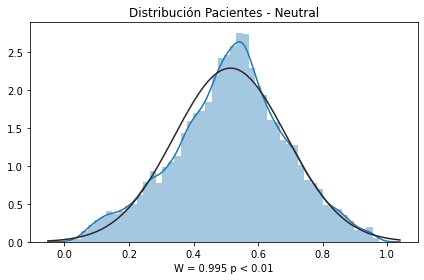

In [93]:
sns.distplot(pac['Neutral'].dropna(how='any'), fit=spss.norm, kde=True, axlabel='{}'.format(shapvalen_pac))
plt.title('Distribución Pacientes - Neutral')
plt.tight_layout()

In [94]:
estats_control, p_value_control = spss.shapiro(control['Neutral'].dropna(how='any'))
shapvalen_control = 'W = {:.3} p < {}1'.format(estats_control, p_value_control)

/Users/javier/anaconda3/envs/pandaspython/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


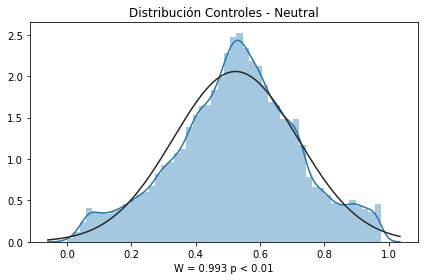

In [95]:
sns.distplot(control['Neutral'].dropna(how='any'), fit=spss.norm, kde=True, axlabel='{}'.format(shapvalen_control))
plt.title('Distribución Controles - Neutral')
plt.tight_layout()